In [1]:
import pandas as pd

df = pd.read_excel("C:/Users/ajjadhav/Downloads/SampleData For Agency Emailsxlsx.xlsx",
                   sheet_name='SampleData',
                   skiprows=1)

df.drop('Unnamed: 0',axis=1,inplace=True)

In [2]:
df.head()

,FIRST_NAME,LAST_NAME,NEW_CONTACT_METHOD_VALUE,ID,CONCAT_REVERSENAME,CONCAT_NAME,USERNAME,DOMAIN,IS_AGENCY,FU_NAME,...,RESULT,FU_REVERSE,FU_AGENCY,FD_GENERALDOMAIN,FD_AGENCY,FU_HIGHESTSCORE,FU_HIGHESTITEM,NAMECOUNT,MANUALCHECK,SAMPLECOUNT
0,AHMED,ALBANNA,184169799@BEESAVEBUNNY.FUN,84260631,ALBANNAAHMED,NaN,NaN,BEESAVEBUNNY,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,P,1
1,KORHAN,YAVUZ,ACIL@ETUR.COM.TR,6589374,YAVUZKORHAN,NaN,ACIL,ETUR,T,22.0,...,NaN,22.0,67.0,68.0,86.0,NaN,NaN,3610,T,1
2,SERDAR,BERBER,ACIL@ETUR.COM.TR,14661069,BERBERSERDAR,NaN,ACIL,ETUR,T,22.0,...,NaN,22.0,67.0,68.0,86.0,NaN,NaN,3610,T,2
3,CEMALETTIN,GOCMEN,ACIL@ETUR.COM.TR,2193172,GOCMENCEMALETTIN,NaN,ACIL,ETUR,T,45.0,...,NaN,45.0,67.0,68.0,86.0,NaN,NaN,3610,T,3
4,LEZAN,TANAL,ACIL@ETUR.COM.TR,8158799,TANALLEZAN,NaN,ACIL,ETUR,T,22.0,...,NaN,45.0,67.0,68.0,86.0,NaN,NaN,3610,T,4


In [3]:
df.shape

(1170, 22)

In [4]:
df.IS_AGENCY[df.IS_AGENCY != 'T'] = 'F'

<ipython-input-4-2785a9c8eaed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.IS_AGENCY[df.IS_AGENCY != 'T'] = 'F'


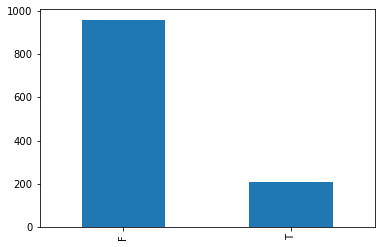

In [5]:
df.IS_AGENCY.value_counts().plot(kind='bar')

In [6]:
categorical_columns = ['FIRST_NAME', 'LAST_NAME', 'NEW_CONTACT_METHOD_VALUE','CONCAT_REVERSENAME', 
                       'USERNAME', 'DOMAIN','MANUALCHECK']

numerical_columns = ['FU_NAME', 'FU_SURNAME', 'FU_FULLNAME', 'RESULT', 'FU_REVERSE',
       'FU_AGENCY', 'FD_GENERALDOMAIN', 'FD_AGENCY', 'NAMECOUNT', 'MANUALCHECK']



from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in categorical_columns:
    df[i] = le.fit_transform(df[i])


In [7]:
newdf = df[categorical_columns + numerical_columns]

In [8]:
newdf['IS_AGENCY'] = df.IS_AGENCY

<ipython-input-8-d185c6244406>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['IS_AGENCY'] = df.IS_AGENCY


In [9]:
newdf.fillna(0,inplace = True)

C:\Users\ajjadhav\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
newdf['IS_AGENCY'] = [1 if x == 'T' else 0 for x in newdf['IS_AGENCY']]

<ipython-input-10-c3f7845554ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['IS_AGENCY'] = [1 if x == 'T' else 0 for x in newdf['IS_AGENCY']]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    newdf.drop('IS_AGENCY',axis=1), newdf['IS_AGENCY'], test_size=0.33, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
finalCols = ['FIRST_NAME', 'LAST_NAME', 'NEW_CONTACT_METHOD_VALUE',
       'CONCAT_REVERSENAME', 'USERNAME', 'DOMAIN', 'MANUALCHECK', 'FU_NAME',
       'FU_SURNAME', 'FU_FULLNAME', 'RESULT', 'FU_REVERSE', 'FU_AGENCY',
       'FD_GENERALDOMAIN', 'FD_AGENCY', 'NAMECOUNT', 'MANUALCHECK']

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train[finalCols],y_train)

y_pred = rf.predict(X_test[finalCols])

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test,y_pred)

0.9870801033591732

In [16]:
confusion_matrix(y_test,y_pred)

array([[319,   4],
       [  1,  63]], dtype=int64)